In [ ]:
import torchvision.datasets as datasets
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.Resize((28, 28)),
    transforms.Grayscale(num_output_channels=1),

])

In [ ]:
tensor = transforms.ToTensor()

In [ ]:
td = datasets.MNIST(root="'mnist_data'" ,train=True,download =True, transform = transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 38505619.68it/s]


Extracting 'mnist_data'/MNIST/raw/train-images-idx3-ubyte.gz to 'mnist_data'/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1131908.30it/s]


Extracting 'mnist_data'/MNIST/raw/train-labels-idx1-ubyte.gz to 'mnist_data'/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2939041.72it/s]


Extracting 'mnist_data'/MNIST/raw/t10k-images-idx3-ubyte.gz to 'mnist_data'/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3097143.35it/s]

Extracting 'mnist_data'/MNIST/raw/t10k-labels-idx1-ubyte.gz to 'mnist_data'/MNIST/raw



In [ ]:
train= dataset

In [ ]:
tesd = datasets.MNIST(root="'mnist_data'" ,train=False,download =True, transform = transform)

In [ ]:
import torch.utils.data as dataloader
train_d = dataloader.DataLoader(td,batch_size=64,shuffle=True)

In [ ]:
test_d = dataloader.DataLoader(tesd,batch_size=64,shuffle=True)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch


class CNN(nn.Module):

  def __init__(self):

    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(1, 9, kernel_size=3, stride=2, padding = 1)

    self.conv2 = nn.Conv2d(9, 18, kernel_size=3, stride=2, padding = 1)

    self.flatten = nn.Flatten()

    self.linear = nn.Linear(18*7*7, 10)

    self.relu = nn.ReLU()

  def forward(self, x):

    x = self.relu(self.conv1(x))

    x = self.relu(self.conv2(x))

    x = self.flatten(x)

    x = self.linear(x)

    x = F.softmax(x, dim=1)

    return x


In [ ]:
model = CNN()

In [ ]:
print(model)

CNN(
  (conv1): Conv2d(1, 9, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(9, 18, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=882, out_features=10, bias=True)
  (relu): ReLU()
)


In [ ]:
optimer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
loss_func= nn.CrossEntropyLoss()

In [ ]:
epochs = 200

def train(epoch, model, train_loader,test_loader, optimizer, loss_func):

  train_loss =[]

  test_loss =[]

  tloss = 0

  for e in range(epoch):

    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):

      optimizer.zero_grad()

      output = model(data)

      loss = loss_func(output, target)

      tloss += loss.item()

      loss.backward()

      optimizer.step()

    train_loss.append(tloss)

    tloss = 0

  #  print(output.shape
  #  print(output.shape)
  # calculate for the test dataset

    model.eval()

    for batch_idx, (data, target) in enumerate(test_loader):

      output = model(data)

      loss = loss_func(output, target)

      tloss += loss.item()

    test_loss.append(tloss)

  return train_loss, test_loss

In [ ]:
# plot the results

In [ ]:
x, y = train(epochs, model, train_d,test_d, optimer, loss_func)

In [ ]:
print(x)

[1685.6132544279099, 1740.9503418207169, 1642.9981627464294, 1633.7262805700302, 1629.0650950670242, 1626.1497468948364, 1623.8858655691147, 1622.9135137796402, 1620.9931403398514, 1620.026533126831, 1619.7723838090897, 1617.4878348112106, 1618.0302810668945, 1616.5844416618347, 1615.6512011289597, 1615.380063176155, 1614.6560831069946, 1614.0220433473587, 1613.5737187862396, 1613.114137172699, 1612.6593009233475, 1613.1037122011185, 1612.5224084854126, 1612.1723504066467, 1611.8153071403503, 1611.8432137966156, 1611.203298330307, 1611.647266626358, 1611.0574969053268, 1610.7391058206558, 1610.4080663919449, 1610.3603167533875, 1610.6676765680313, 1611.2029696702957, 1610.2044854164124, 1609.9578665494919, 1609.6850010156631, 1609.9055055379868, 1609.6655340194702, 1609.13232421875, 1609.8351237773895, 1609.7555240392685, 1609.3396044969559, 1609.21357691288, 1608.869266986847, 1609.3311244249344, 1609.0062996149063, 1608.9643150568008, 1608.5815259218216, 1608.521925330162, 1608.80226

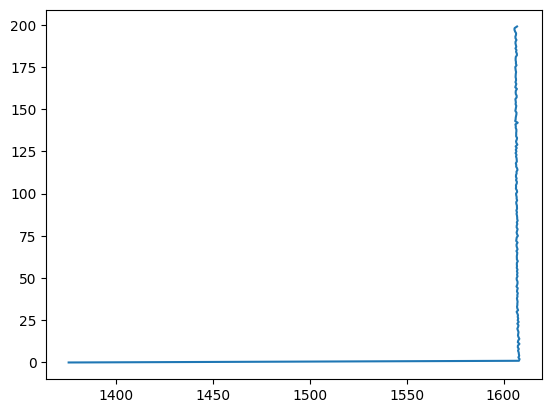

In [ ]:
from matplotlib import pyplot as plt

y0= list( range(epochs))

plt.plot(x, y0)
plt.show()

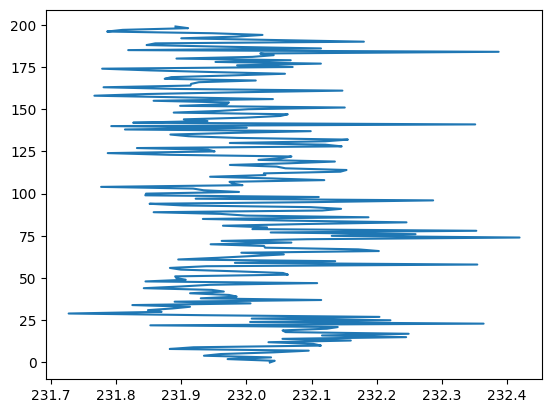

In [ ]:
plt.plot(y, y0)
plt.show()

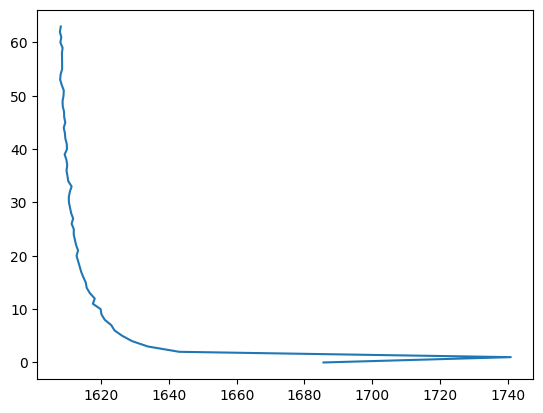

In [ ]:
from matplotlib import pyplot as plt

y0= list( range(epochs))

plt.plot(x, y0)
plt.show()

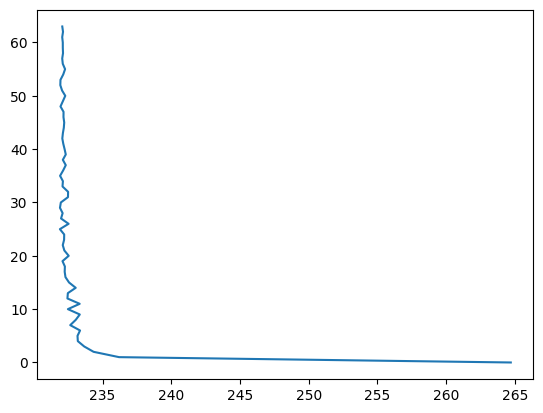

In [ ]:
plt.plot(y, y0)
plt.show()

In [ ]:
# accuracy

for idx,